In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv("rawdataWholeExport.csv.gz",compression="gzip")
data.head()

,Unnamed: 0,Modell,Marke,Garantie,country,Zustand,Zylinder,Kraftstoff,Erstzulassung,Außenfarbe,...,Getriebeart,Gänge,Hubraum,Kraftstoff.1,Schadstoffklasse,haendler,privat,price,predicted_price,zscore
0,0,forTwo,smart,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,1.0,Elektro,2018.0,Weiß,...,Automatik,1.0,0,Elektro,0,1,0,13990.0,14181.518000,0.347734
1,1,Kamiq,Skoda,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,3.0,Benzin,2019.0,Schwarz,...,Schaltgetriebe,6.0,999 cm³,Benzin,0,1,0,22990.0,22671.210000,0.527887
2,2,CX-5,Mazda,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,0.0,Diesel,2019.0,Schwarz,...,Automatik,0.0,2.191 cm³,Diesel,Euro 6d-TEMP,1,0,29740.0,29867.999158,0.238744
3,3,NP300,Nissan,0,Oesterreich,Gebraucht,4.0,Diesel,2017.0,Schwarz,...,Automatik,7.0,2.299 cm³,Diesel,0,1,0,28620.0,28737.400000,0.220558
4,4,Q3,Audi,0,Oesterreich,Gebraucht,0.0,Diesel,2019.0,Grau,...,Schaltgetriebe,0.0,1.968 cm³,Diesel,0,1,0,34970.0,34613.290000,0.592953


In [9]:
data["Marke"].value_counts()

Volkswagen        4795
Mercedes-Benz     2689
Audi              2294
Ford              2242
BMW               2179
Opel              1629
Skoda             1417
Renault            778
Hyundai            706
Fiat               692
SEAT               649
Toyota             608
Kia                589
Mazda              511
Peugeot            491
Citroen            446
Nissan             414
Volvo              299
Dacia              274
Jeep               263
Suzuki             224
Porsche            212
Land Rover         203
Mitsubishi         199
MINI               171
Honda              145
smart              114
Subaru              83
Abarth              55
Chevrolet           53
Chrysler            49
Alfa Romeo          45
Maserati            44
Bentley             44
Cupra               43
Jaguar              43
Trucks-Lkw          38
Dodge               34
Ferrari             28
0                   28
Lexus               19
Tesla               17
Daihatsu            16
Saab       

In [14]:
allBrands,allBrands_count = np.unique(data["Marke"],return_counts=True)
allModels,allallModels_count = np.unique(data["Modell"],return_counts=True)


In [15]:
data["Modell"].value_counts()

Golf         860
Tiguan       617
Octavia      542
A4           473
A3           459
            ... 
Punto Evo      1
GL 350         1
760            1
Hilux          1
LC 500h        1
Name: Modell, Length: 667, dtype: int64

In [20]:
# get average per model
data[data["Marke"]=="Volkswagen"]["Modell"].value_counts()

Golf               860
Tiguan             617
Polo               412
Caddy              351
Touran             346
T-Roc              333
Passat Variant     298
Golf Variant       245
Golf Sportsvan     129
up!                117
Touareg            113
Sharan             110
Passat              81
0                   74
Golf GTI            65
T6 Multivan         58
Golf Plus           57
T-Cross             49
T6 Transporter      43
Amarok              34
T5 Transporter      29
Golf Cabriolet      29
T6 California       28
T5 Multivan         27
Fox                 26
T5                  23
Phaeton             22
Passat CC           22
Passat Alltrack     18
Jetta               16
Lupo                15
Crafter             14
New Beetle          12
T6 Caravelle        11
Polo GTI            10
Scirocco             9
T5 Caravelle         9
T5 Kombi             8
Bora                 8
T4 California        7
Eos                  6
Käfer                6
Arteon               6
CC         

In [26]:
data["Marke_Modell"] = data["Marke"] + "_" + data["Modell"]
allBrandMakeCombs = np.unique(data["Marke_Modell"])
allBrandMakeCombs

array(['0_0', 'Abarth_500', 'Abarth_595', 'Abarth_595 Pista',
       'Abarth_595 Turismo', 'Abarth_595C', 'Abarth_695',
       'Alfa Romeo_147', 'Alfa Romeo_159', 'Alfa Romeo_Brera',
       'Alfa Romeo_GT', 'Alfa Romeo_Giulia', 'Alfa Romeo_Giulietta',
       'Alfa Romeo_MiTo', 'Alfa Romeo_Stelvio', 'Alpina_B3', 'Alpina_B4',
       'Audi_0', 'Audi_80', 'Audi_90', 'Audi_A1', 'Audi_A2', 'Audi_A3',
       'Audi_A4', 'Audi_A4 allroad', 'Audi_A5', 'Audi_A6',
       'Audi_A6 allroad', 'Audi_A7', 'Audi_A8', 'Audi_Cabriolet',
       'Audi_Coupe', 'Audi_Q2', 'Audi_Q3', 'Audi_Q5', 'Audi_Q7',
       'Audi_R8', 'Audi_RS Q8', 'Audi_RS3', 'Audi_RS4', 'Audi_RS6',
       'Audi_RS7', 'Audi_S1', 'Audi_S2', 'Audi_S3', 'Audi_S4', 'Audi_S5',
       'Audi_S7', 'Audi_SQ5', 'Audi_SQ7', 'Audi_SQ8', 'Audi_TT',
       'Audi_TTS', 'Audi_e-tron', 'BMW_0', 'BMW_114', 'BMW_116',
       'BMW_118', 'BMW_120', 'BMW_125', 'BMW_216', 'BMW_218', 'BMW_220',
       'BMW_225', 'BMW_235', 'BMW_316', 'BMW_318', 'BMW_320', 'BMW_

In [57]:
mostCommons = []
for brandmakecomb in allBrandMakeCombs:
    mostCommons.append(data[data["Marke_Modell"] == brandmakecomb].value_counts()[:1].index.tolist()[0])

In [58]:
mostCommons = pd.DataFrame(mostCommons,columns=data.columns)
mostCommons.set_index("Marke_Modell",inplace=True)
mostCommons.head()

,Unnamed: 0,Modell,Marke,Garantie,country,Zustand,Zylinder,Kraftstoff,Erstzulassung,Außenfarbe,...,Getriebeart,Gänge,Hubraum,Kraftstoff.1,Schadstoffklasse,haendler,privat,price,predicted_price,zscore
Marke_Modell,,,,,,,,,,,,,,,,,,,,,
0_0,25966,0,0,0,0,0,0.0,0,0.0,0,...,0,0.0,0,0,0,0,0,0.0,0.000,0.019115
Abarth_500,7011,500,Abarth,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,4.0,Benzin,2010.0,Grau,...,Schaltgetriebe,5.0,1.368 cm³,Benzin,Euro 5,1,0,7990.0,8022.248,0.074448
Abarth_595,15378,595,Abarth,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,4.0,Benzin,2017.0,Nicht angegeben,...,Schaltgetriebe,5.0,1.368 cm³,Benzin,Euro 6,1,0,17499.0,17499.000,0.019115
Abarth_595 Pista,15808,595 Pista,Abarth,0,Oesterreich,Neu,0.0,Benzin,0.0,Grau,...,Schaltgetriebe,5.0,1.368 cm³,Benzin,0,1,0,27490.0,27287.396,0.328527
Abarth_595 Turismo,16630,595 Turismo,Abarth,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,0.0,Benzin,2016.0,Nicht angegeben,...,Automatik,0.0,1.368 cm³,Benzin,Euro 6,1,0,14999.0,17967.698,5.113011


In [67]:
mostCommons.loc["Abarth_500"]["price"]

7990.0

In [84]:
from scipy import stats
priceDiff = []
for brandmakecomb in allBrandMakeCombs:
    priceDiff.append(abs(mostCommons.loc[brandmakecomb]["price"]-mostCommons.loc[brandmakecomb]["predicted_price"]))
z = abs(stats.zscore(priceDiff))

In [85]:
mostCommons["zscore"] = z

In [86]:
badguess = z[z> 3.0]
goodguess = z[z<0.1]

In [87]:
mostCommons.iloc[badguess]

,Unnamed: 0,Modell,Marke,Garantie,country,Zustand,Zylinder,Kraftstoff,Erstzulassung,Außenfarbe,...,Getriebeart,Gänge,Hubraum,Kraftstoff.1,Schadstoffklasse,haendler,privat,price,predicted_price,zscore
Marke_Modell,,,,,,,,,,,,,,,,,,,,,
Alfa Romeo_147,12633,147,Alfa Romeo,0,Oesterreich,Gebraucht,0.0,Diesel,2005.0,Schwarz,...,Schaltgetriebe,0.0,1.900 cm³,Diesel,Euro 4,1,0,1099.0,1193.718000,0.270066
Alfa Romeo_Brera,17508,Brera,Alfa Romeo,0,Deutschland,Gebraucht,0.0,Diesel (Rußpartikelfilter),2010.0,Schwarz,...,Schaltgetriebe,6.0,2.387 cm³,Diesel (Rußpartikelfilter),Euro 4,1,0,9999.0,11000.640824,0.284602
Alfa Romeo_Giulietta,10995,Giulietta,Alfa Romeo,0,Deutschland,Neu,0.0,Diesel (Rußpartikelfilter),0.0,Rot,...,Schaltgetriebe,0.0,1.598 cm³,Diesel (Rußpartikelfilter),Euro 6d-TEMP,1,0,23808.0,23789.914000,0.316934
Alfa Romeo_159,17061,159,Alfa Romeo,0,Oesterreich,Gebraucht,4.0,Diesel (Rußpartikelfilter),2008.0,Schwarz,...,Schaltgetriebe,6.0,1.910 cm³,Diesel (Rußpartikelfilter),Euro 4,0,1,2700.0,2785.714000,0.275573
Abarth_595C,25946,595C,Abarth,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,4.0,Benzin,2015.0,Schwarz,...,Schaltgetriebe,5.0,1.368 cm³,Benzin,Euro 6,True,False,13480.0,13480.000000,0.327995
Abarth_595 Turismo,16630,595 Turismo,Abarth,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,0.0,Benzin,2016.0,Nicht angegeben,...,Automatik,0.0,1.368 cm³,Benzin,Euro 6,1,0,14999.0,17967.698000,1.487642
Abarth_595 Turismo,16630,595 Turismo,Abarth,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,0.0,Benzin,2016.0,Nicht angegeben,...,Automatik,0.0,1.368 cm³,Benzin,Euro 6,1,0,14999.0,17967.698000,1.487642
Abarth_695,7028,695,Abarth,12 Monate,Deutschland,Gebraucht,4.0,Super 95,2018.0,Blau,...,Automatik,5.0,1.242 cm³,Super 95,Euro 6,1,0,23990.0,23997.150000,0.323623
Abarth_595 Pista,15808,595 Pista,Abarth,0,Oesterreich,Neu,0.0,Benzin,0.0,Grau,...,Schaltgetriebe,5.0,1.368 cm³,Benzin,0,1,0,27490.0,27287.396000,0.204084


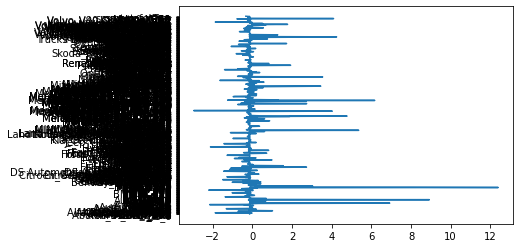

In [77]:
#import matplotlib.pyplot as plt
#plt.plot(mostCommons["zscore"],mostCommons.index)

In [89]:
mostCommons.sort_values(by='zscore', ascending=True)

,Unnamed: 0,Modell,Marke,Garantie,country,Zustand,Zylinder,Kraftstoff,Erstzulassung,Außenfarbe,...,Getriebeart,Gänge,Hubraum,Kraftstoff.1,Schadstoffklasse,haendler,privat,price,predicted_price,zscore
Marke_Modell,,,,,,,,,,,,,,,,,,,,,
Mercedes-Benz_GLE 450,14812,GLE 450,Mercedes-Benz,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,6.0,Benzin,2019.0,Weiß,...,Automatik,9.0,2.999 cm³,Benzin,Euro 6d-TEMP,1,0,85700.0,85167.434667,0.002282
Ford_Edge,17136,Edge,Ford,12 Monate,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,4.0,Diesel,2017.0,Schwarz,...,Automatik,0.0,1.997 cm³,Diesel,Euro 6,1,0,29880.0,29335.886000,0.004781
Volkswagen_T5 Transporter,17217,T5 Transporter,Volkswagen,0,Oesterreich,Gebraucht,4.0,Diesel,2006.0,Weiß,...,Schaltgetriebe,5.0,1.896 cm³,Diesel,Euro 3,1,0,6990.0,6462.367556,0.005299
Ford_Taunus,11527,Taunus,Ford,0,Deutschland,Oldtimer,0.0,Benzin,1962.0,Rot,...,0,0.0,0,Benzin,0,0,1,1250.0,1774.292000,0.007342
Subaru_Forester,16349,Forester,Subaru,60 Monate,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,4.0,Elektro/Benzin,2020.0,Grün,...,Automatik,0.0,1.995 cm³,Elektro/Benzin,Euro 6d,1,0,31500.0,30976.943143,0.008097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mercedes-Benz_G 500,17428,G 500,Mercedes-Benz,0,Deutschland,Gebraucht,8.0,Super 95 / Super E10 95,2019.0,Grau,...,Automatik,9.0,0,Super 95 / Super E10 95,Euro 6,1,0,134900.0,124143.392000,6.250682
Audi_RS Q8,25154,RS Q8,Audi,0,Deutschland,Neu,8.0,Super Plus 98 (Rußpartikelfilter),0.0,Schwarz,...,Automatik,8.0,3.996 cm³,Super Plus 98 (Rußpartikelfilter),Euro 6d-TEMP,True,False,159000.0,146956.784571,7.037563
BMW_840,17499,840,BMW,0,Deutschland,Tipp:Prüfe das Fahrzeug bei der Besichtigung a...,6.0,Diesel,2019.0,Schwarz,...,Automatik,8.0,2.993 cm³,Diesel,Euro 6,1,0,78850.0,65100.773200,8.080949


In [98]:
mostCommons.iloc[1].values

array([7011, '500', 'Abarth', '0', 'Deutschland',
       'Tipp:Prüfe das Fahrzeug bei der Besichtigung auf Mängel. Generell gehen wir bei allen Angeboten von einem guten Fahrzeug-Zustand aus.',
       4.0, 'Benzin', 2010.0, 'Grau', 'Vollleder, Sonstige', 'Kleinwagen',
       2.0, 4.0, 'Schaltgetriebe', 5.0, '1.368 cm³', 'Benzin', 'Euro 5',
       '1', '0', 7990.0, 8022.24800000005, 0.30827273340836886],
      dtype=object)

In [91]:
mostCommons.to_csv("MostCommonEntrieswZScore.csv",header=True,index=False)